In [ ]:
!pip install ultralytics

In [ ]:
!pip install clearml

In [3]:
import zipfile
import os
from ultralytics import YOLO
from clearml import Task, Logger
from clearml import Dataset

In [ ]:
!clearml-init

In [ ]:
# dataset_name = "Dataset_for_YOLO"
# dataset_project = "Variant0.1"

from clearml import Dataset

dataset = Dataset.get(dataset_id='4b1238c811244b8588510687832ad98f')
dataset.get_mutable_local_copy(target_folder='Dataset_for_YOLO')


In [ ]:
task = Task.init(project_name="Variant0.1", task_name="YOLOv8_training_0.3")


Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=Dataset_for_YOLO/data.yaml, epochs=50, patience=50, batch=50, imgsz=608, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opt

2023-10-22 18:06:31,756 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/Variant0.1/YOLOv8_training_0.3.deb0dd4fb57b415da4ca4c235180ab16/models/best.pt


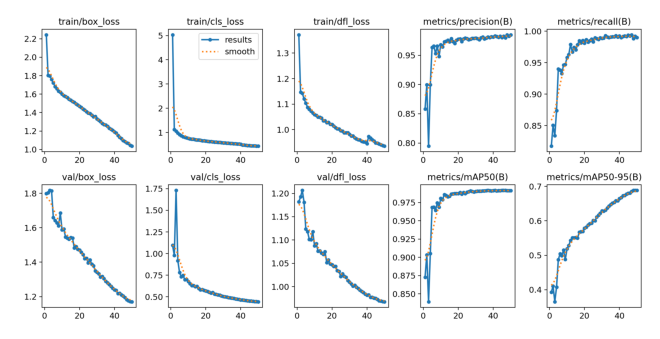

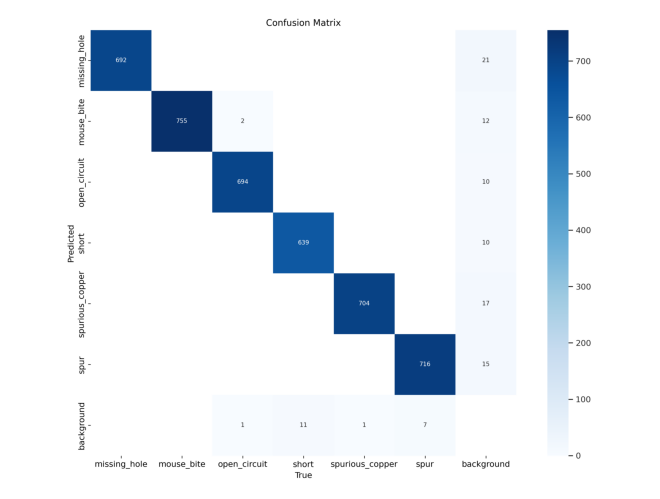

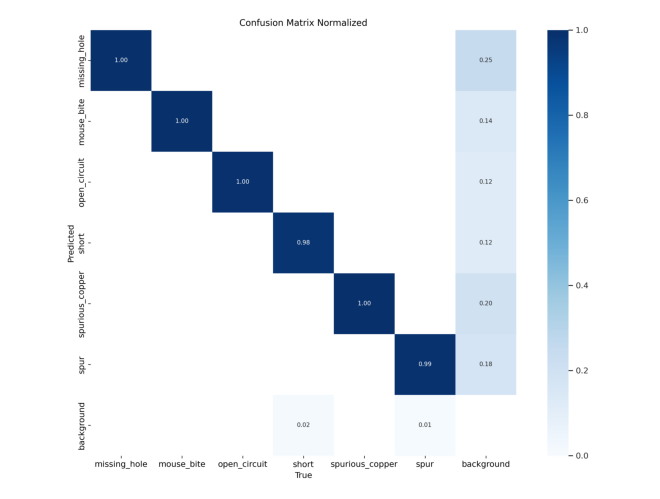

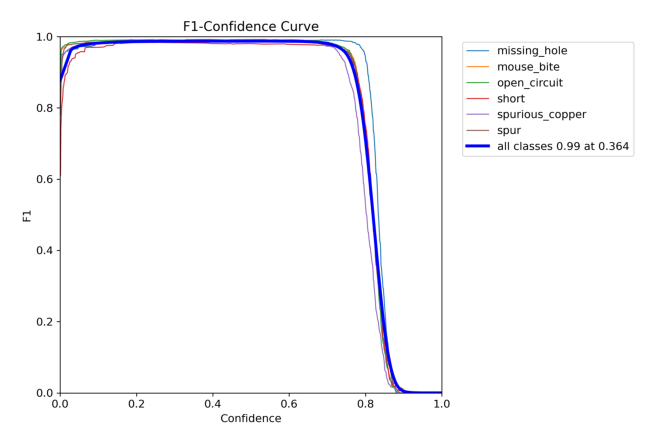

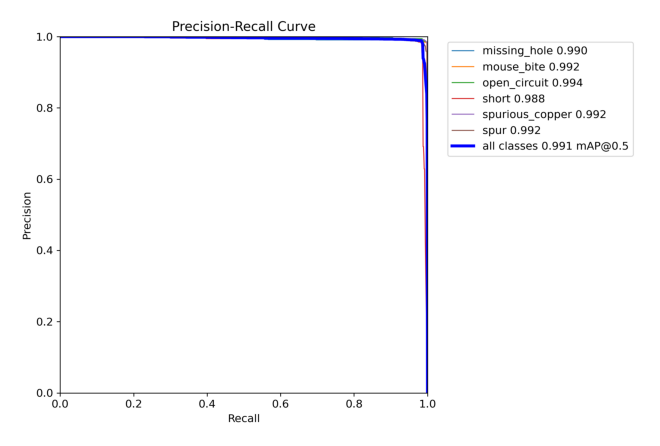

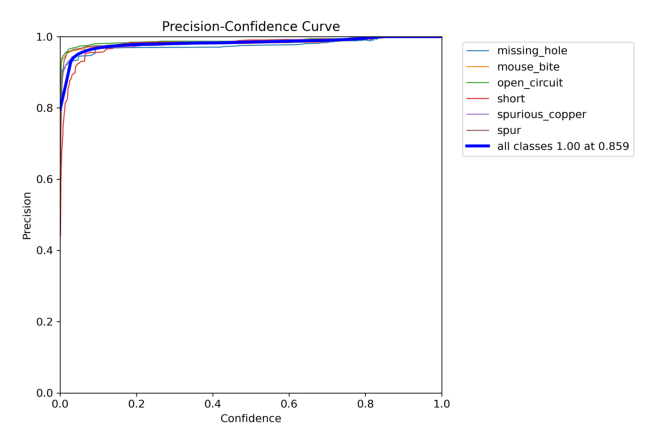

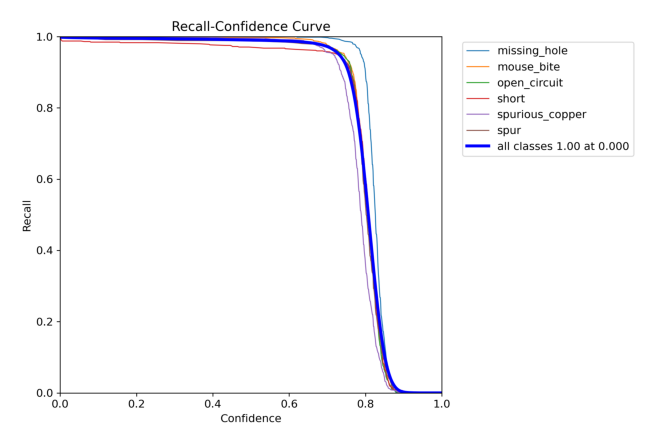

In [9]:
#model = YOLO('yolov8s.pt')
#task = Task.init(project_name="Variant0.1", task_name="YOLOv8_training_0.3")
imgsz = 608
epochs = 50
batch = 50
name = 'YOLOv8s'

# Load a model
model_variant = "yolov8s"
# Log "model_variant" parameter to task
task.set_parameter("model_variant", model_variant)
args = dict(data='Dataset_for_YOLO/data.yaml',
            epochs=epochs,
            imgsz=imgsz,
            batch=batch)
# Load the YOLOv8 model
model = YOLO(f'{model_variant}.pt')

task.connect(args)

# Train the model
# If running remotely, the arguments may be overridden by ClearML if they were changed in the UI
results = model.train(**args)

In [10]:
task.close()

In [12]:
# model = YOLO("runs/detect/train2/weights/best.pt")

In [ ]:
# pre = model.predict(
#    source="test",
#    show=True,
#    imgsz=608,
#    hide_labels=True,
#    save=True,
#    name="val_pred",
#    conf=0.1,
#    )